## ДЗ №1
Распознать изображение с игральными картами и вывести изображение и номинал каждой карты

1. Прочитайте изображение из файла и выведите его на экран:

In [ ]:
import cv2
import matplotlib.pyplot as plt
from skimage.io import imread
import numpy as np

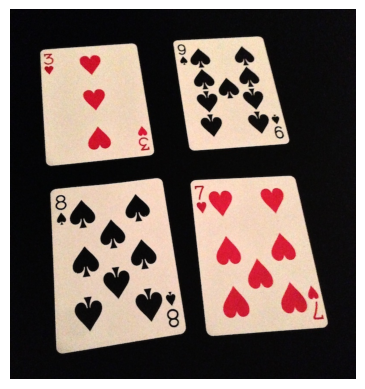

In [ ]:
file_path = 'http://farm4.staticflickr.com/3828/9060450367_b67ef44444_o_d.png'

# Загрузка изображения с использованием skimage
image = imread(file_path)

# Отображение изображения с использованием matplotlib
plt.imshow(image)
plt.axis('off')  # Отключаем оси координат
plt.show()

2. Выполните последовательно 2 преобразования: переведите изображение в оттенки серого (COLOR_BGR2GRAY) и примените размытие (GaussianBlur):


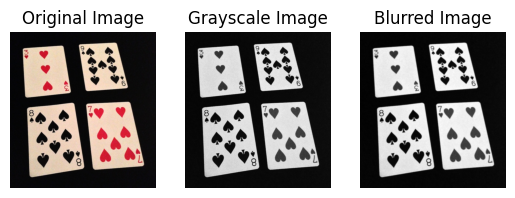

In [ ]:
# Перевод в оттенки серого (COLOR_BGR2GRAY)
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Применение размытия (GaussianBlur)
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Отображение исходного изображения
plt.subplot(1, 3, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

# Отображение изображения в оттенках серого
plt.subplot(1, 3, 2)
plt.imshow(gray_image, cmap='gray')
plt.title('Grayscale Image')
plt.axis('off')

# Отображение размытого изображения
plt.subplot(1, 3, 3)
plt.imshow(blurred_image, cmap='gray')
plt.title('Blurred Image')
plt.axis('off')

plt.show()

3. Найдите 4 контура максимального размера и выведите их на исходном изображении:

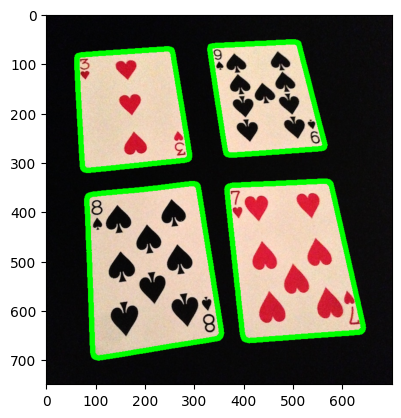

In [ ]:
# Загрузка изображения с использованием skimage
image = imread(file_path)
numcards = 4

flag, thresh = cv2.threshold(blurred_image, 128, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
contours = sorted(contours, key=cv2.contourArea, reverse = True)[:numcards]

contours_img = image.copy()
cv2.drawContours(contours_img, contours, contourIdx = -1, color = (0, 255, 0, 255), thickness = 10)
plt.imshow(contours_img)
plt.show()


4. Примените к каждому контуру проективное преобразование и выведите отдельным изображением:

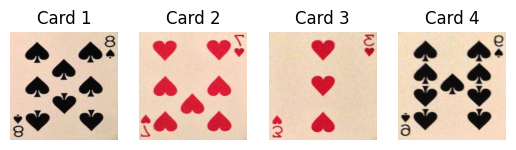

In [ ]:
# Проективное преобразование и вывод каждого контура отдельным изображением
for i, contour in enumerate(contours):
    # Приближение контура до прямоугольника
    epsilon = 0.02 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)

    # Подготовка массива точек исходного изображения и массива точек на выходе
    pts1 = np.float32(approx)
    pts2 = np.float32([[0, 0], [300, 0], [300, 300], [0, 300]])

    # Проективное преобразование
    matrix = cv2.getPerspectiveTransform(pts1, pts2)
    result = cv2.warpPerspective(image, matrix, (300, 300))

    # Отображение каждого контура после преобразования
    plt.subplot(1, numcards, i + 1)
    plt.imshow(result)
    plt.title(f'Card {i + 1}')
    plt.axis('off')

plt.show()

5. Найдите количество символов на одной карте:
- на изображении карты найдите все контуры;
- найдите максимальный контур (не совпадающий с самой картой);
- найдите другие контуры, отличающиеся от максимального по размеру не более 10%;
- посчитайте количество максимальных контуров.

9


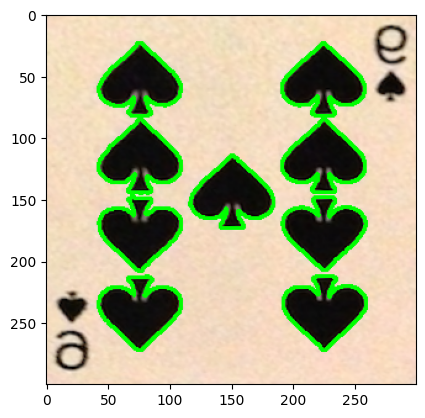

In [ ]:
img_gray = cv2.cvtColor(result,cv2.COLOR_RGB2GRAY)
contours_img = result.copy()

flag, thresh = cv2.threshold(img_gray, 150, 120, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
contours = sorted(contours, key=cv2.contourArea, reverse=True)

main_contours = []
main_area = 0
for contour in contours:
  if cv2.contourArea(contour) > .9*result.shape[0]*result.shape[1]: continue
  if main_area == 0:
    main_contours.append(contour)
    main_area = cv2.contourArea(contour)
  else:
    if cv2.contourArea(contour) > 0.9 * main_area :
      main_contours.append(contour)
print(len(main_contours))

cv2.drawContours(contours_img, main_contours, contourIdx = -1, color = (0, 255, 0, 255), thickness = 2)
plt.imshow(contours_img)
plt.show()

6. Соберите все предыдущие команды в один код, чтобы на выходе получилось следующее изображение:

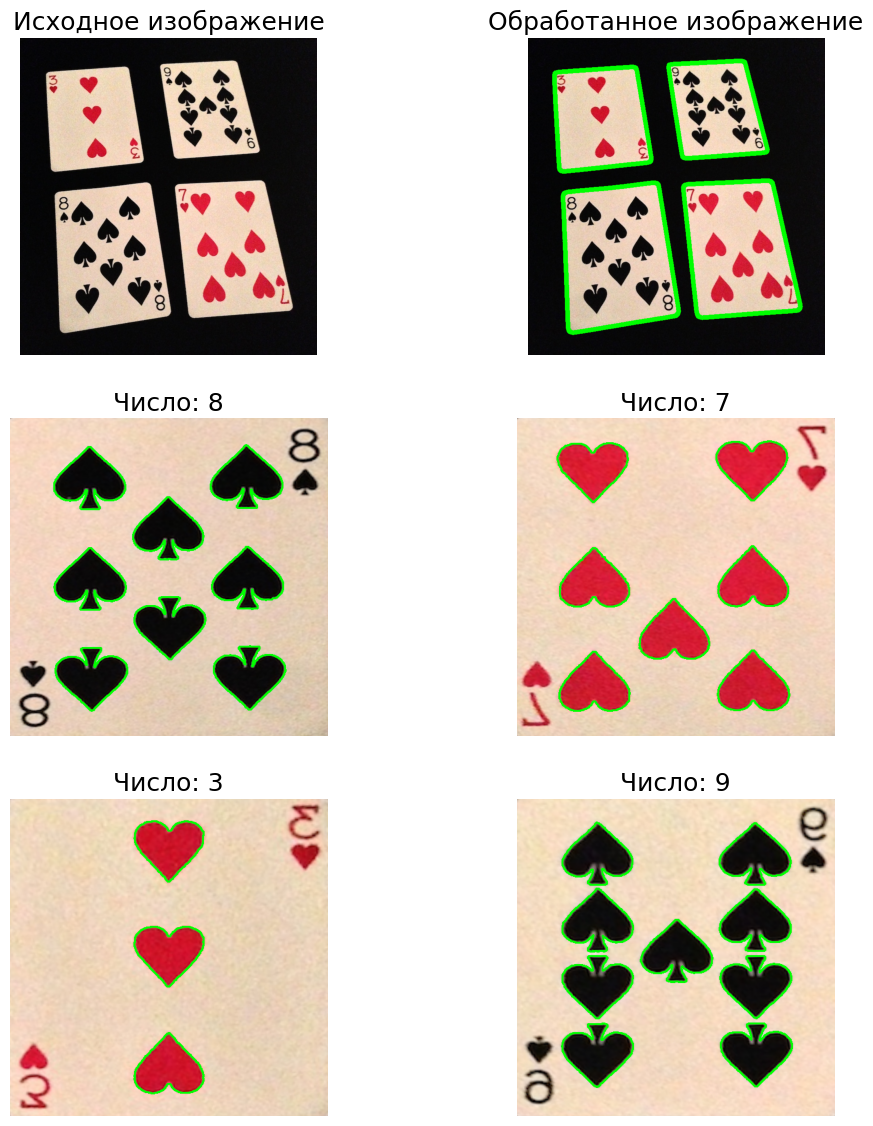

In [ ]:
file_path = 'http://farm4.staticflickr.com/3828/9060450367_b67ef44444_o_d.png'

# Загрузка изображения с использованием skimage
image = imread(file_path)

plt.figure(figsize=(12, 14))

plt.subplot(3, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

numcards = 4

flag, thresh = cv2.threshold(blurred_image, 128, 255, cv2.THRESH_BINARY)
contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_NONE)
contours = sorted(contours, key=cv2.contourArea, reverse = True)[:numcards]

contours_img = image.copy()
cv2.drawContours(contours_img, contours, contourIdx = -1, color = (0, 255, 0, 255), thickness = 10)

plt.subplot(3, 2, 1)
plt.imshow(image)
plt.axis('off')
plt.title("Исходное изображение", fontsize = 18)
plt.subplot(3, 2, 2)
plt.imshow(contours_img)
plt.axis('off')
plt.title("Обработанное изображение", fontsize = 18)

img_array = []

for i, contour in enumerate(contours):
    # Приближение контура до прямоугольника
    epsilon = 0.02 * cv2.arcLength(contour, True)
    approx = cv2.approxPolyDP(contour, epsilon, True)

    # Подготовка массива точек исходного изображения и массива точек на выходе
    pts1 = np.float32(approx)
    pts2 = np.float32([[0, 0], [500, 0], [500, 500], [0, 500]])

    # Проективное преобразование
    matrix = cv2.getPerspectiveTransform(pts1, pts2)
    result = cv2.warpPerspective(image, matrix, (500, 500))

    img_array.append(result)


for i in range (numcards):
  img_gray = cv2.cvtColor(img_array[i],cv2.COLOR_RGB2GRAY)
  contours_img = img_array[i].copy()

  flag, thresh = cv2.threshold(img_gray, 150, 120, cv2.THRESH_BINARY)
  contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
  contours = sorted(contours, key=cv2.contourArea, reverse=True)

  main_contours = []
  main_area = 0
  for contour in contours:
    if cv2.contourArea(contour) > .9*result.shape[0]*result.shape[1]: continue
    if main_area == 0:
      main_contours.append(contour)
      main_area = cv2.contourArea(contour)
    else:
      if cv2.contourArea(contour) > 0.9 * main_area :
        main_contours.append(contour)

  cv2.drawContours(contours_img, main_contours, contourIdx = -1, color = (0, 255, 0, 255), thickness = 2)
  img_array[i] = cv2.drawContours(contours_img, main_contours, contourIdx = -1, color = (0, 255, 0, 255), thickness = 2)
  plt.subplot(3, 2, i + 3)
  plt.title('Число: '+str(len(main_contours)), fontsize = 18)
  plt.axis('off')
  plt.imshow(img_array[i])